# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [2]:
# Your code here Load the data
df = pd.read_csv('C:/Users/Beatrice/Downloads/assignment2_data_2024.csv')
df.head(10)

#change maligant to malignant
df['label'] = df['label'].replace('maligant', 'malignant')
df.head(10)

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,malignant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
5,malignant,13.44652732131547,17.957298,88.110900,581.567322,0.107720,0.128542,0.112771,0.060392,0.190065,...,0.377676,1.093476,2.625960,34.685524,0.007198,0.028281,0.033037,0.011569,0.020574,0.004214
6,malignant,15.55225019385569,19.372353,101.558673,790.894093,0.095646,0.106649,0.098832,0.058009,0.181995,...,0.419524,1.049395,2.963010,44.927448,0.006110,0.021505,0.029675,0.011264,0.018432,0.003234
7,malignant,13.986378166753155,19.841165,91.325055,628.642710,0.104265,0.124145,0.090085,0.052699,0.195356,...,0.475859,1.264925,3.262840,45.387955,0.007677,0.026486,0.029210,0.012797,0.018196,0.004264
8,malignant,13.75810271397698,20.003542,90.623580,611.621162,0.107706,0.137510,0.125245,0.065605,0.200009,...,0.367752,1.098793,2.693607,34.350214,0.006602,0.029599,0.034888,0.012244,0.020763,0.003930
9,malignant,13.561893436106663,20.963861,89.362028,592.703670,0.104794,0.154252,0.139630,0.062670,0.189246,...,0.376591,1.380643,2.650348,35.125624,0.007264,0.042568,0.048240,0.012894,0.019610,0.006033


In [3]:
#Extract the feature names and label names for use later on.
featureList = df.columns.values[1:]
print("Column list:",featureList )

Column list: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error']


In [4]:
# Checking data set size
print("Data set size:", df.shape)
# Get quick statstical data
print(df.describe())
    

Data set size: (220, 21)
       mean texture  mean perimeter    mean area  mean smoothness  \
count    220.000000      220.000000   220.000000       220.000000   
mean      18.991963       89.866240   620.956227         0.096480   
std        1.427635        7.366180   106.419871         0.004961   
min       15.349270       74.690886    -2.645499         0.084651   
25%       17.914319       84.911981   558.731832         0.092797   
50%       18.928256       88.587737   603.806128         0.096457   
75%       19.995859       93.066393   655.690435         0.099817   
max       24.430831      121.247839  1103.740620         0.113423   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        220.000000      220.000000           220.000000     220.000000   
mean           0.102879        0.085281             0.046867       0.181850   
std            0.019819        0.026911             0.012548       0.010816   
min            0.075184        0.0507

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [6]:
# Check for NaN under an entire DataFrame and class count

class_counts = df['label'].value_counts()

print("NaN values: ", df.isnull().values.any())
print (class_counts)

NaN values:  True
label
benign       154
malignant     66
Name: count, dtype: int64


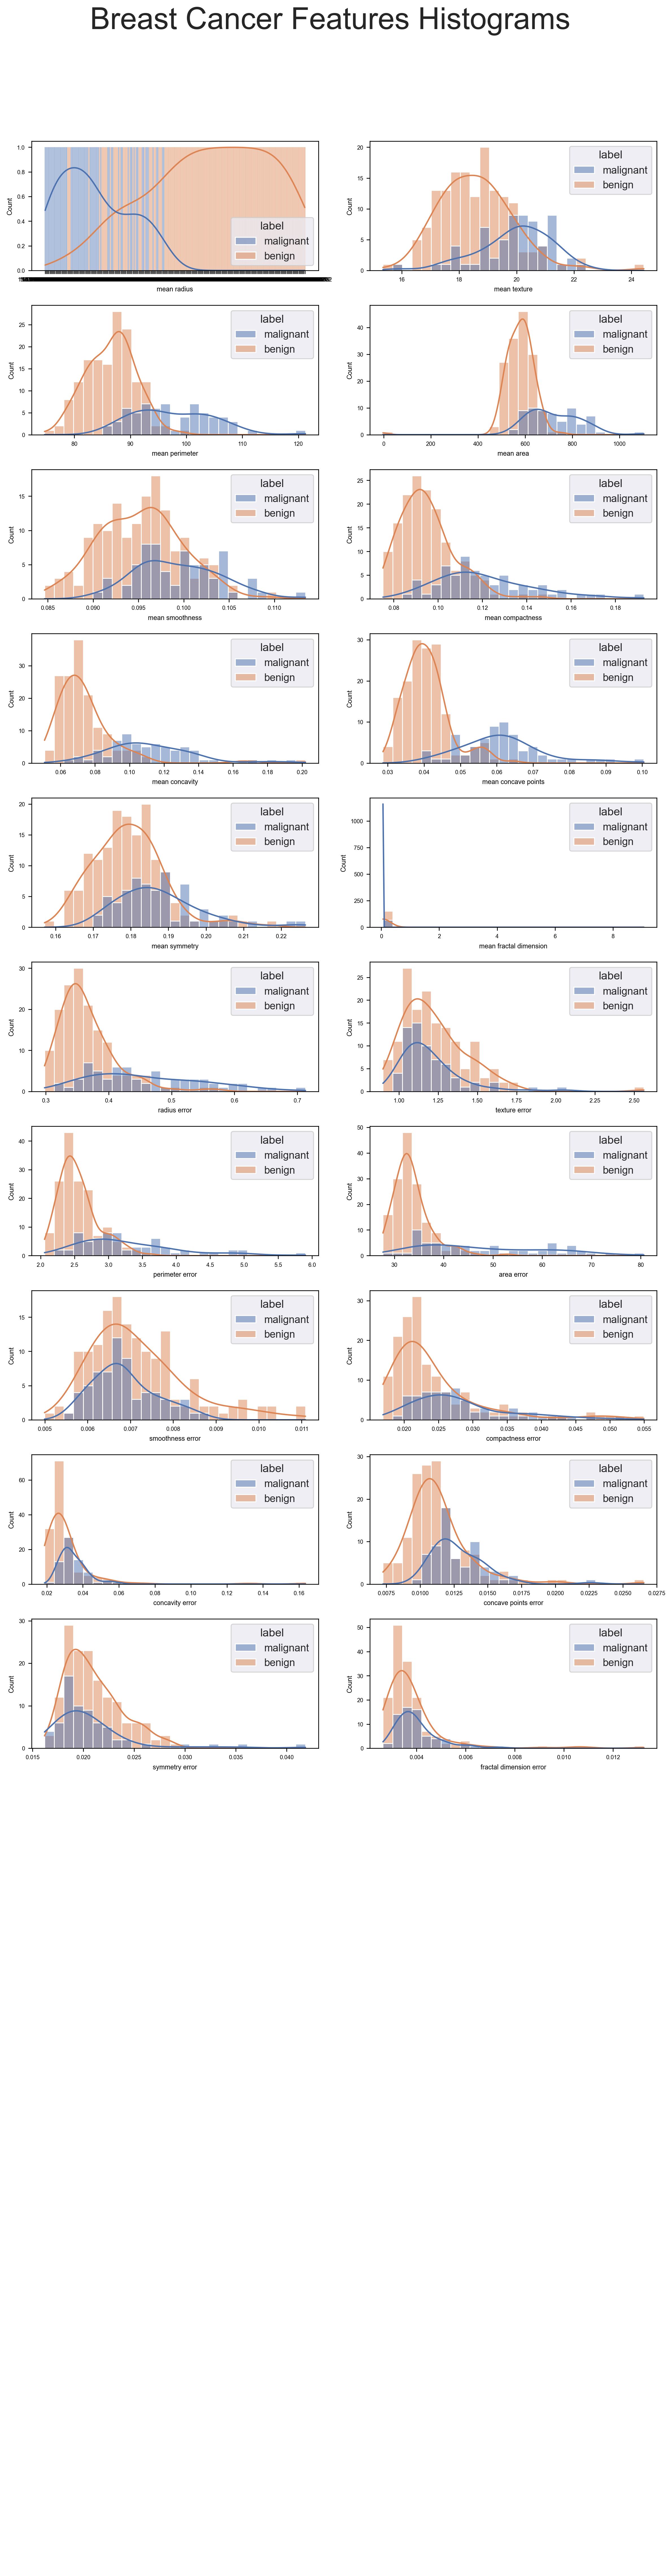

In [7]:
fig, axes = plt.subplots(15, 2, figsize=(10, 40))
sns.set(style="darkgrid")
fig.suptitle('Breast Cancer Features Histograms', fontsize=32)

for rowNo, row in enumerate(axes):
    for colNo, col in enumerate(row):
        index = rowNo * 2 + colNo
        if index < len(featureList):
            sns.histplot(data=df, x=featureList[index], hue='label', ax=axes[rowNo, colNo], bins=27, kde=True, edgecolor=None)
        else:
            axes[rowNo, colNo].axis('off')  # Turn off the axes for empty subplots

  # Adjust layout to accommodate title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
#change erroneous data 
print("Data set size:", df.shape)
#mean area min no negative with mean

df['mean area'] = df['mean area'].apply(lambda x: 603.806128 if np.isclose(x, -2.645499) else x)

#mean fractal dimension max 9. typo change to 0

df['mean fractal dimension'] = df['mean fractal dimension'].apply(lambda x: 0.065897 if np.isclose(x, 9.065897) else x)

df['mean radius'] = df['mean radius'].replace('n12.254518716420597', 12.254518716420597)
print(df.describe())

Data set size: (220, 21)
       mean texture  mean perimeter    mean area  mean smoothness  \
count    220.000000      220.000000   220.000000       220.000000   
mean      18.991963       89.866240   623.712825         0.096480   
std        1.427635        7.366180    97.689276         0.004961   
min       15.349270       74.690886   477.371592         0.084651   
25%       17.914319       84.911981   560.235202         0.092797   
50%       18.928256       88.587737   604.201198         0.096457   
75%       19.995859       93.066393   655.690435         0.099817   
max       24.430831      121.247839  1103.740620         0.113423   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        220.000000      220.000000           220.000000     220.000000   
mean           0.102879        0.085281             0.046867       0.181850   
std            0.019819        0.026911             0.012548       0.010816   
min            0.075184        0.0507

In [9]:
df.head(10)

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,malignant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
5,malignant,13.44652732131547,17.957298,88.110900,581.567322,0.107720,0.128542,0.112771,0.060392,0.190065,...,0.377676,1.093476,2.625960,34.685524,0.007198,0.028281,0.033037,0.011569,0.020574,0.004214
6,malignant,15.55225019385569,19.372353,101.558673,790.894093,0.095646,0.106649,0.098832,0.058009,0.181995,...,0.419524,1.049395,2.963010,44.927448,0.006110,0.021505,0.029675,0.011264,0.018432,0.003234
7,malignant,13.986378166753155,19.841165,91.325055,628.642710,0.104265,0.124145,0.090085,0.052699,0.195356,...,0.475859,1.264925,3.262840,45.387955,0.007677,0.026486,0.029210,0.012797,0.018196,0.004264
8,malignant,13.75810271397698,20.003542,90.623580,611.621162,0.107706,0.137510,0.125245,0.065605,0.200009,...,0.367752,1.098793,2.693607,34.350214,0.006602,0.029599,0.034888,0.012244,0.020763,0.003930
9,malignant,13.561893436106663,20.963861,89.362028,592.703670,0.104794,0.154252,0.139630,0.062670,0.189246,...,0.376591,1.380643,2.650348,35.125624,0.007264,0.042568,0.048240,0.012894,0.019610,0.006033


## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [10]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    score = fbeta_score(yt, yp, beta=10)
    print("f10 score: ", score)
    return score

def f01_score(yt,yp):
    score = fbeta_score(yt, yp, beta=0.1)
    print("f0.1 score: ", score)
    return score


In [11]:
cp = df.copy()
df = cp.copy()

In [12]:
# Your answer here
from sklearn.preprocessing import MinMaxScaler

 
df['label'] = df['label'].map({'malignant': 1, 'benign': 0})

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', MinMaxScaler()) ])


scalledDf = preproc_pl.fit_transform(df)



In [13]:
# Split data into appropriate sets using the stratify option to obtain consistent proportions of classes in each set.
from sklearn.model_selection import train_test_split

bigtrain_set, test_set = train_test_split(scalledDf, test_size=0.2, random_state=42, stratify=scalledDf[:,0])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42, stratify=bigtrain_set[:,0])
X_train = train_set[:,1:]
y_train = train_set[:,0]
X_test = test_set[:,1:]
y_test = test_set[:,0]
X_val = val_set[:,1:]
y_val = val_set[:,0]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')
print(np.mean(y_train),np.mean(y_test),np.mean(y_val))

Shapes are [(140, 20), (140,), (44, 20), (44,), (36, 20), (36,)]
0.3 0.29545454545454547 0.3055555555555556


In [14]:
# BASELINE Half Postive and Half Negative as it has been stratified
half_positive_count = len(y_train) // 2
half_negative_count = len(y_train) - half_positive_count

# Create the half positive and half negative array
halfResult = np.concatenate((np.ones(half_positive_count), np.zeros(half_negative_count)))

np.random.seed(42)
np.random.shuffle(halfResult)

In [15]:
# Measure the baseline performance with the following metrics
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, \
                            roc_curve, auc, f1_score, accuracy_score

# balanced accuracy score
def bAccuracyScore(yt,yp):
    score = balanced_accuracy_score(yt,yp)
    print("Balanced accuracy score:", score)

    return score

def precisionScore(yt,yp):
    score = precision_score(yt,yp)
    print("Precision score:", score)

    return score

def recallScore(yt,yp):
    score = recall_score(yt,yp)
    print("Recall score:", score)

    return score


def f1Score(yt,yp):
    score = f1_score(yt,yp, average=None)
    print("F1 score:", score)

    return score

def aucCal(yt,yp):
    fpr, tpr, thresholds = roc_curve(yt,yp, pos_label=1)
    auc_sgd = auc(fpr,tpr)
    print("Area under the curve:", auc_sgd)

    return auc_sgd

def printMetricScore(yt,yp):
    f10_score(yt,yp)
    f01_score(yt,yp)
    bAccuracyScore(yt,yp)
    precisionScore(yt,yp)
    recallScore(yt,yp)
    f1Score(yt,yp)
    aucCal(yt,yp)

    # Confuse matrix
    plt.figure(figsize=(2, 2))
    cmat = confusion_matrix(yt,yp, normalize='true',labels=[0,1])
    sns.heatmap(cmat,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Normalised Confusion Matrix', size = 8)
    plt.show()
    None

Scores with half postive and half negative
f10 score:  0.27250781028117005
f0.1 score:  0.4494145199063232
Balanced accuracy score: 0.4714285714285714
Precision score: 0.4523809523809524
Recall score: 0.2714285714285714
F1 score: [0.55952381 0.33928571]
Area under the curve: 0.4714285714285714


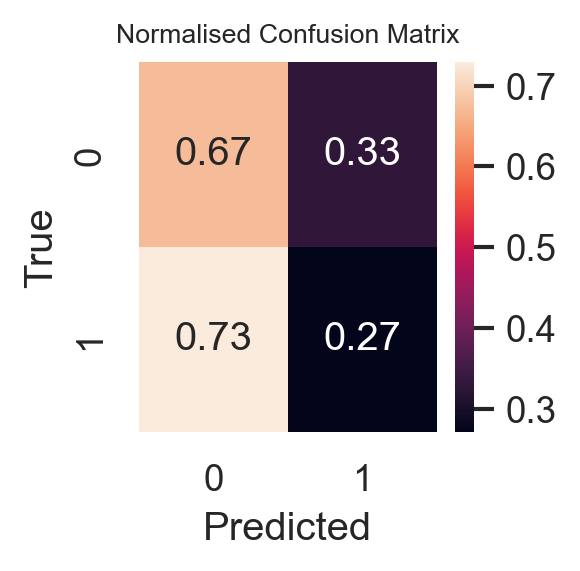

In [16]:
#Measure the baseline performance with the following metrics and confusion matrix

print("Scores with half postive and half negative")
printMetricScore(halfResult,y_train)

f10 score:  0.8991097922848663
f0.1 score:  0.818918918918919
Balanced accuracy score: 0.9115384615384616
Precision score: 0.8181818181818182
Recall score: 0.9
F1 score: [0.94117647 0.85714286]
Area under the curve: 0.9115384615384615


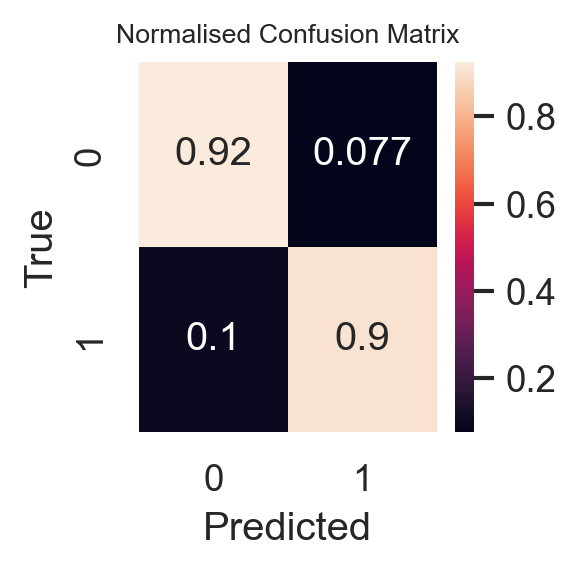

In [17]:
# Your code here
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train) 
ySg_p = sgd.predict(X_val)
printMetricScore(ySg_p,y_val)

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [19]:
print("I would choose the F1 score because it provides information that balances the trade-off between precision and recall. F1 scores is also suitable for imbalanced datasets as there are 154 benign records but only 66 malignant records.") 

I would choose the F1 score because it provides information that balances the trade-off between precision and recall. F1 scores is also suitable for imbalanced datasets as there are 154 benign records but only 66 malignant records.


### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [19]:
# Score of F1. precision and recall is still displayed for transparent understanding.
def printScore(yt,yp):
    f1Score(yt,yp)
    precisionScore(yt,yp)
    recallScore(yt,yp)
    bAccuracyScore(yt,yp)
    f10_score(yt,yp)
    f01_score(yt,yp)
    aucCal(yt,yp)

    # Confuse matrix
    plt.figure(figsize=(2, 2))
    cmat = confusion_matrix(yt,yp, normalize='true')
    sns.heatmap(cmat,annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Normalised Confusion Matrix', size = 8)
    plt.show()
    None

Best score is 0.1290451429843303 with best params of {'alpha': 0.0001, 'eta0': 10, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
Score on a totally fresh dataset: 0.28867513459481287
RMSE is 0.28867513459481287 

F1 score: [0.93877551 0.86956522]
Precision score: 0.9090909090909091
Recall score: 0.8333333333333334
Balanced accuracy score: 0.8958333333333334
f10 score:  0.8340214698596202
f0.1 score:  0.9082733812949642
Area under the curve: 0.8958333333333335


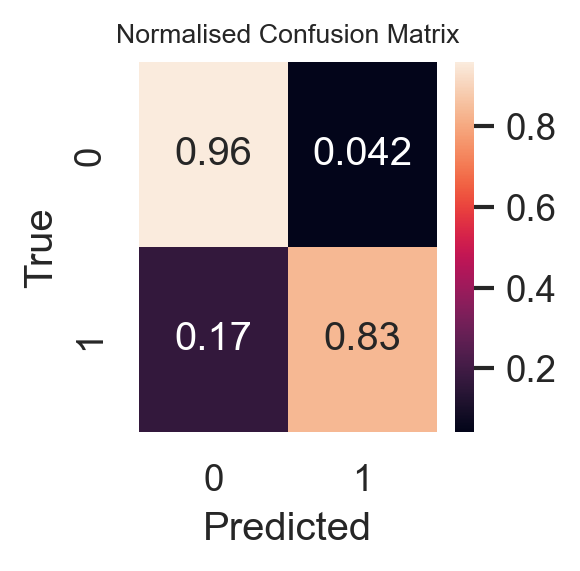

In [50]:
# SGD Classifier
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=Warning)

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
parameters = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0' : [1, 10, 100]}
gridcvSgd = GridSearchCV(sgd, parameters, cv=5, scoring='neg_root_mean_squared_error')
gridcvSgd.fit(X_train, y_train)
print(f'Best score is {-gridcvSgd.best_score_} with best params of {gridcvSgd.best_params_}')  
print("Score on a totally fresh dataset:", -gridcvSgd.score(X_val, y_val))

# Scoring
gridcvSgd.best_estimator_.fit(X_train,y_train)
y_val_pred = gridcvSgd.best_estimator_.predict(X_val)
print(f'RMSE is {np.sqrt(mean_squared_error(y_val_pred,y_val))} \n')
printScore(y_val_pred,y_val)

Best score is 0.19451051005512804 with best params of {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Score on a totally fresh dataset: 0.28867513459481287
RMSE is 0.28867513459481287 

F1 score: [0.94117647 0.85714286]
Precision score: 0.8181818181818182
Recall score: 0.9
Balanced accuracy score: 0.9115384615384616
f10 score:  0.8991097922848663
f0.1 score:  0.818918918918919
Area under the curve: 0.9115384615384615


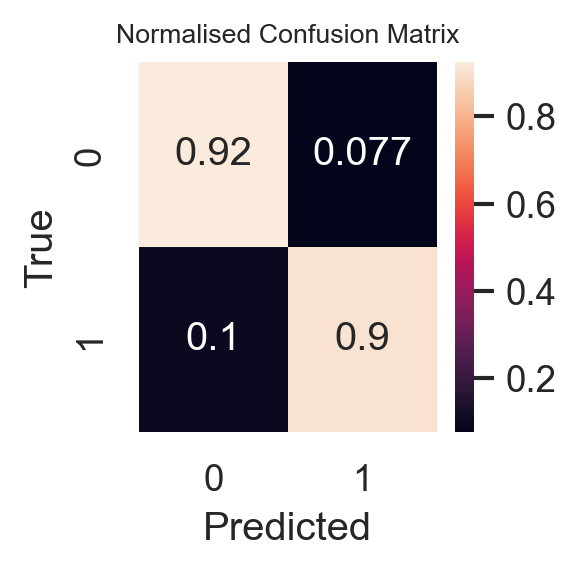

In [49]:
#SVM

from sklearn.svm import SVC
svc = SVC()

parameters = {'C': [0.001, 0.1, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear','rbf']}


gridcvSvc = GridSearchCV(svc, parameters, cv=5, scoring='neg_root_mean_squared_error')
gridcvSvc.fit(X_train, y_train)
print(f'Best score is {-gridcvSvc.best_score_} with best params of {gridcvSvc.best_params_}')  
print("Score on a totally fresh dataset:", -gridcvSvc.score(X_val, y_val))

# Scoring
gridcvSvc.best_estimator_.fit(X_train,y_train)
y_val_pred = gridcvSvc.best_estimator_.predict(X_val)
print(f'RMSE is {np.sqrt(mean_squared_error(y_val_pred,y_val))} \n')
printScore(y_val_pred,y_val)

Best score is 0.19815319244837734 with best params of {'n_neighbors': 3, 'weights': 'uniform'}
Score on a totally fresh dataset: 0.23570226039551584
RMSE is 0.23570226039551584 

F1 score: [0.96       0.90909091]
Precision score: 0.9090909090909091
Recall score: 0.9090909090909091
Balanced accuracy score: 0.9345454545454546
f10 score:  0.9090909090909091
f0.1 score:  0.9090909090909092
Area under the curve: 0.9345454545454546


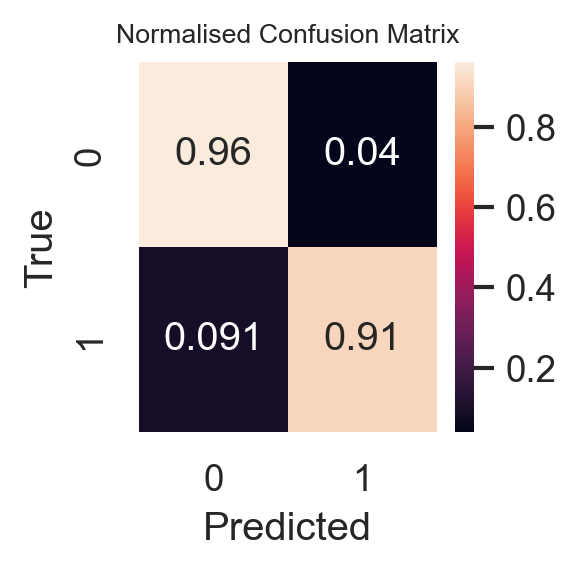

In [48]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,10,20,30,50], 'weights':['uniform','distance']}
gridcvKnn = GridSearchCV(knn, parameters, cv=5, scoring='neg_root_mean_squared_error')
gridcvKnn.fit(X_train, y_train)

print(f'Best score is {-gridcvKnn.best_score_} with best params of {gridcvKnn.best_params_}')  
print("Score on a totally fresh dataset:", -gridcvKnn.score(X_val, y_val))

#scoring

gridcvKnn.best_estimator_.fit(X_train,y_train)
y_val_pred = gridcvKnn.best_estimator_.predict(X_val)
print(f'RMSE is {np.sqrt(mean_squared_error(y_val_pred,y_val))} \n')
printScore(y_val_pred,y_val)


In [2]:
from sklearn.metrics import mean_squared_error
#Choose the best model and display the final results of this model.
print("KNN has the highest balanced accuracy on the validation set. KNN also has higher F1 scores, which \n indicates better performance in terms of both precision and recall. KNN shows strong precision and recall, suggesting it effectively identifies positive samples without many false negatives. KNN has the highest AUC, indicating a strong overall classification performance. Additionally it also has the lowest RMSE which can indicate a stronger model performance \n")
# Fit the best KNN model on the entire training data and predict on validation data
best_model = gridcvKnn.best_estimator_
best_model.fit(X_train, y_train)
y_val_pred_best = best_model.predict(X_val)

# Print final evaluation metrics for the best model
print(f'Validation RMSE is {np.sqrt(mean_squared_error(y_val_pred_best,y_val))} \n')
print(f"Final evaluation for the best model (KNN) on validation set:")
printScore(y_val_pred_best,y_val)

MODEL = gridcvKnn.best_estimator_
MODEL.fit(np.concatenate((X_train, X_val)),np.concatenate((y_train, y_val)))

y_test_pred = MODEL.predict(X_test)

# Print final evaluation metrics for the best model
print(f'Test RMSE is {np.sqrt(mean_squared_error(y_test_pred,y_test))} \n')
print(f"Final evaluation for the best model (KNN) on testing set:")
printScore(y_test_pred,y_test)

KNN has the highest balanced accuracy on the validation set. KNN also has higher F1 scores, which 
 indicates better performance in terms of both precision and recall. KNN shows strong precision and recall, suggesting it effectively identifies positive samples without many false negatives. KNN has the highest AUC, indicating a strong overall classification performance. Additionally it also has the lowest RMSE which can indicate a stronger model performance 



NameError: name 'gridcvKnn' is not defined

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [ ]:
# The probability that a sample from a person with a malignant tumor is given a result that they do not have cancer is 10%. This means your model is correctly identifying all malignant tumors in the testing set based on this normalized confusion matrix.

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [34]:
# Your code here

positiveDF = scalledDf[scalledDf[:,0] == 1, :] 
negativeDF = scalledDf[scalledDf[:,0] == 0, :]

TScore = {}
# Calculate score
for idx, ft in enumerate(featureList):
    x1 = positiveDF[:, idx+1]
    x2 = negativeDF[:, idx+1]

    score =  (np.mean(x2) - np.mean(x1))/(0.5*(np.std(x2) + np.std(x1)))

    TScore[ft] = score

top4TScore = dict( sorted(TScore.items(),key=lambda item: np.abs(item[1]),reverse=True)[:4])
print("Top 4 features with score: \n",top4TScore)



Top 4 features with score: 
 {'mean concave points': -2.352518375806777, 'mean perimeter': -1.9397614777356968, 'mean area': -1.8169705342709557, 'area error': -1.7487490467458093}


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [35]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [36]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

In [37]:
# Get feature colums indices
topf = list(top4TScore.keys())
query_cols = [df.columns.get_loc(col) for col in topf]

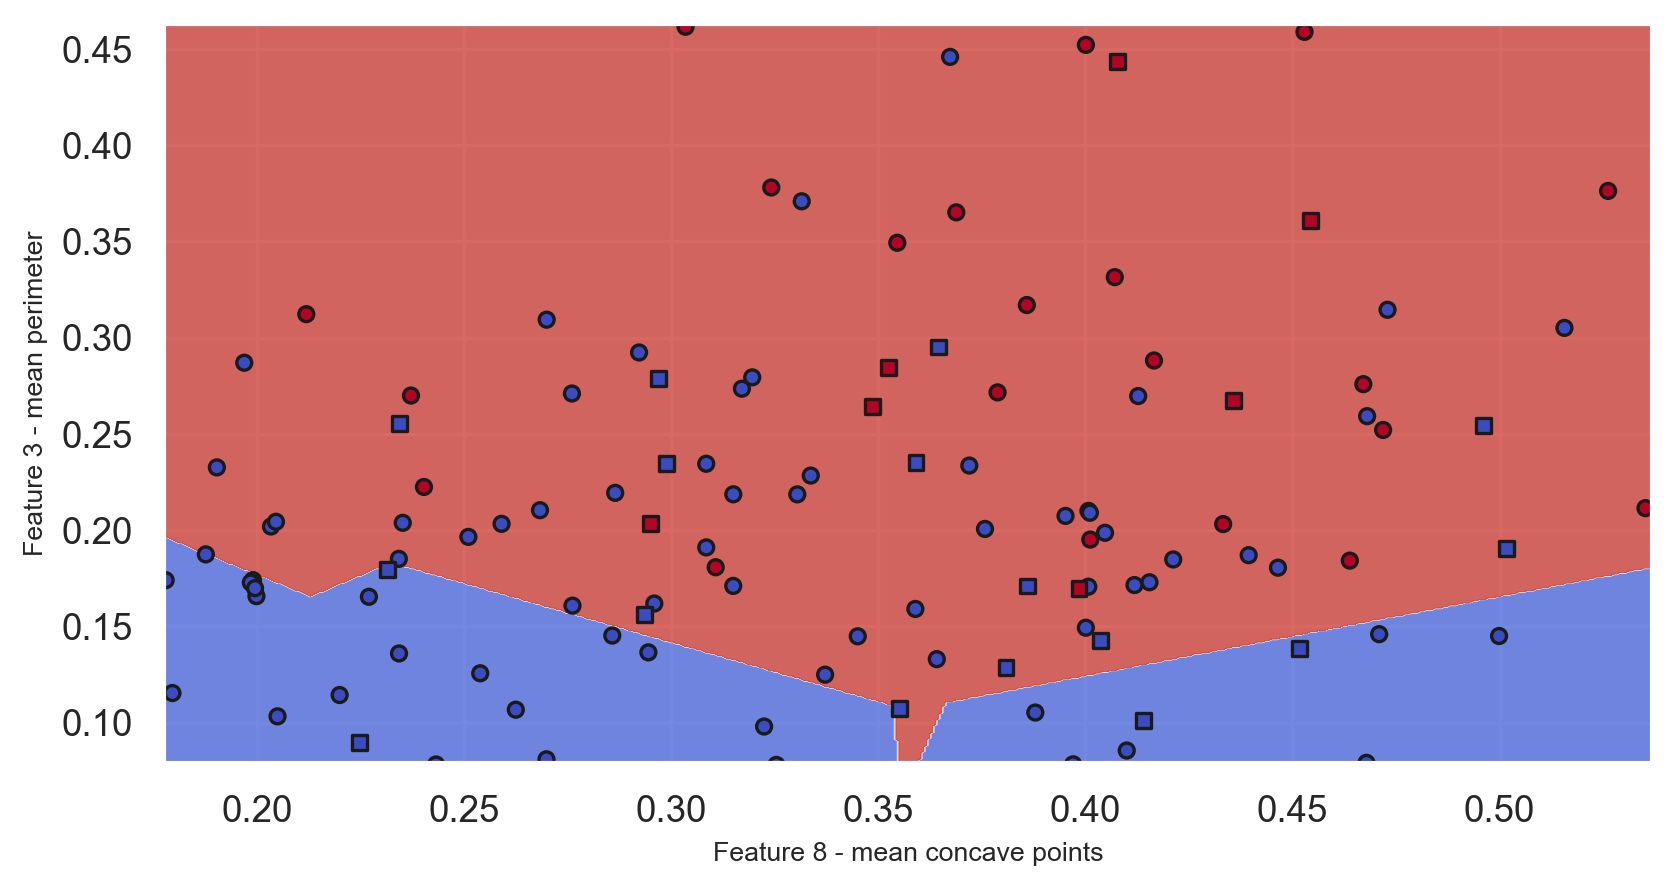

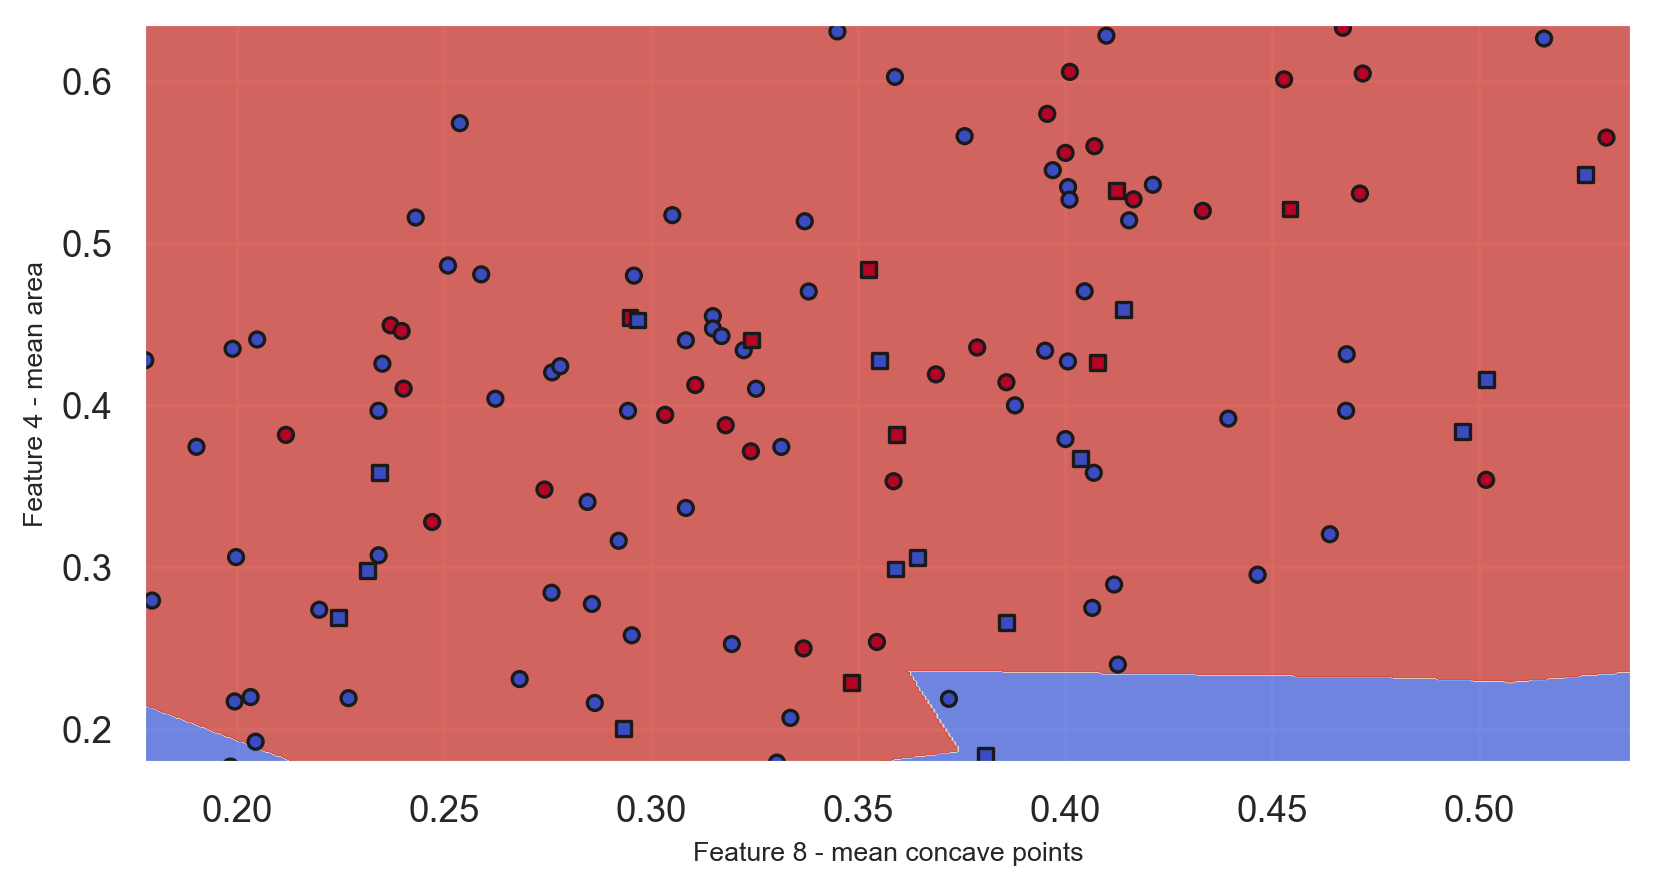

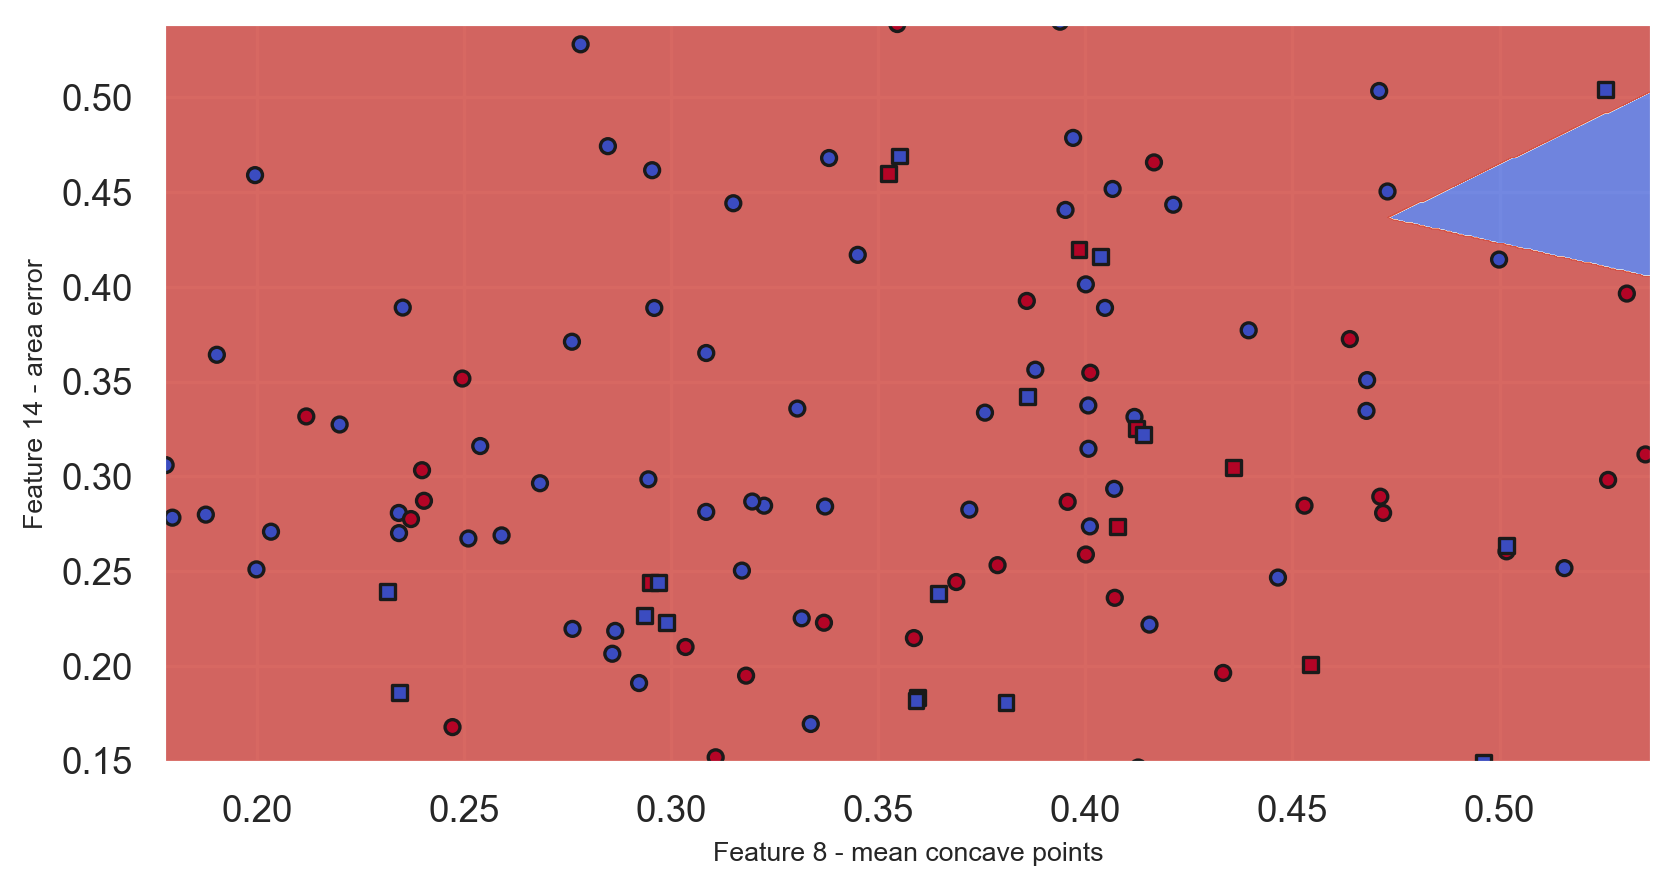

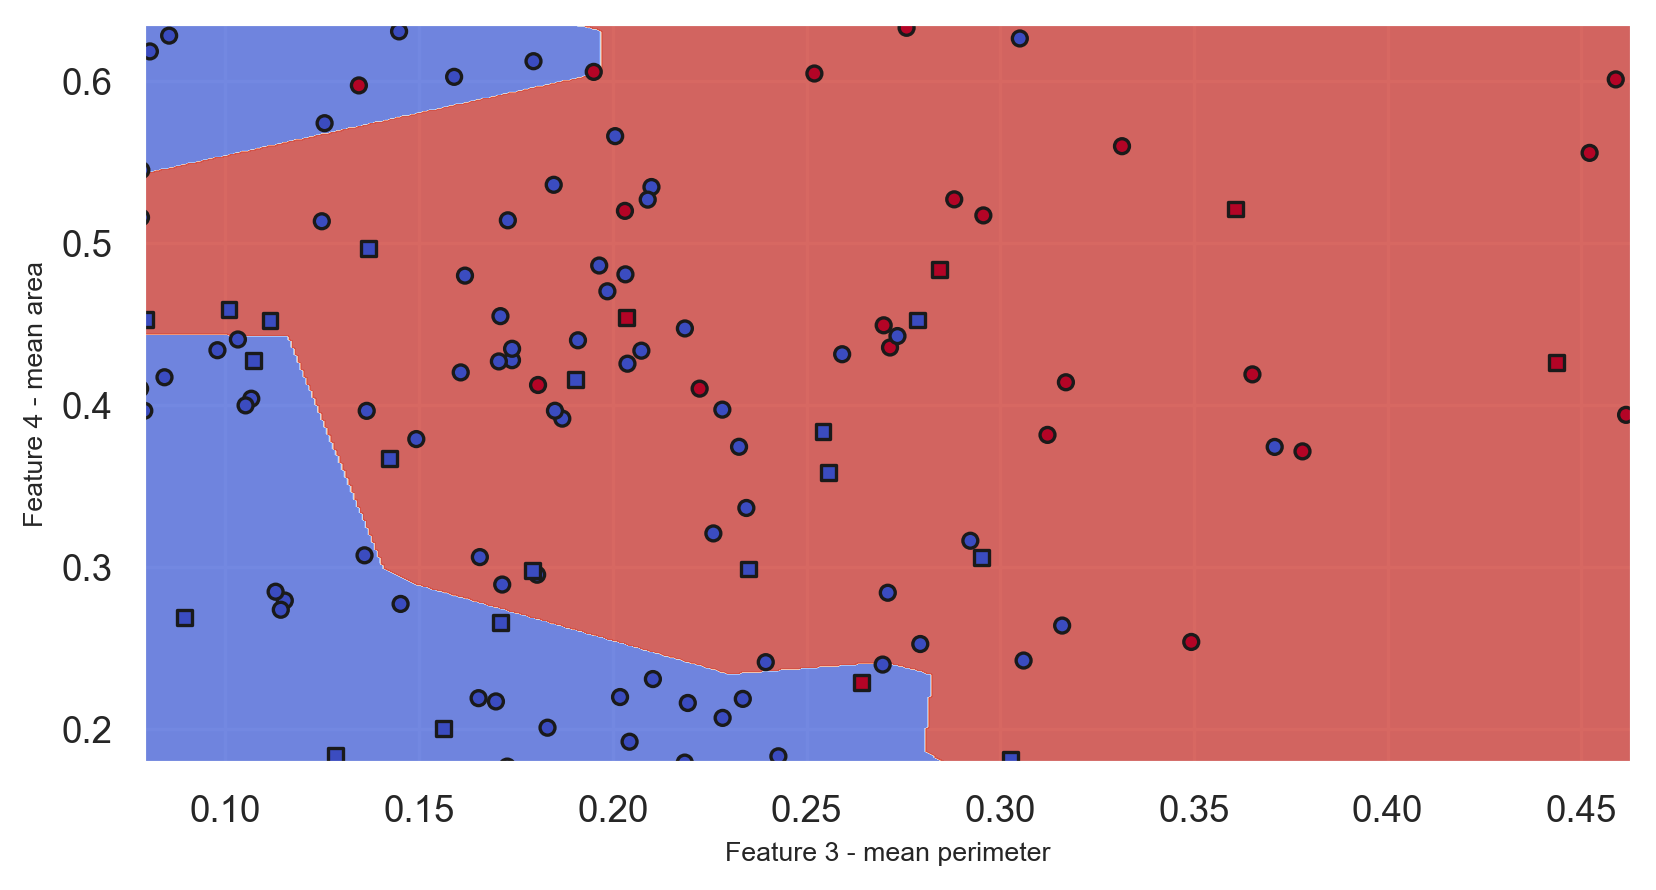

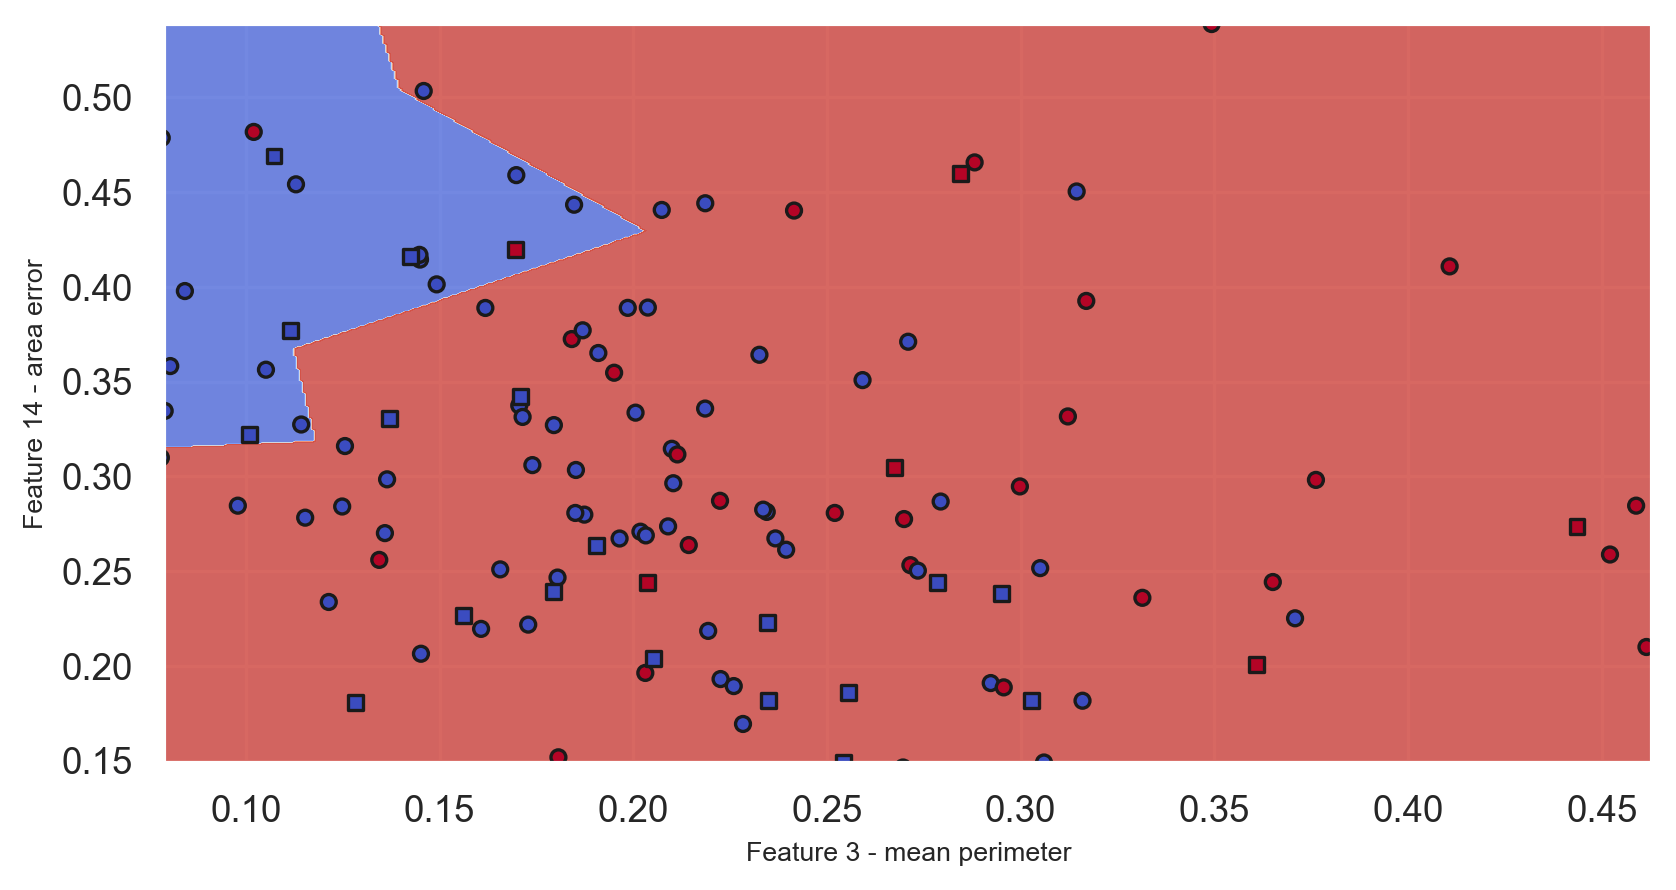

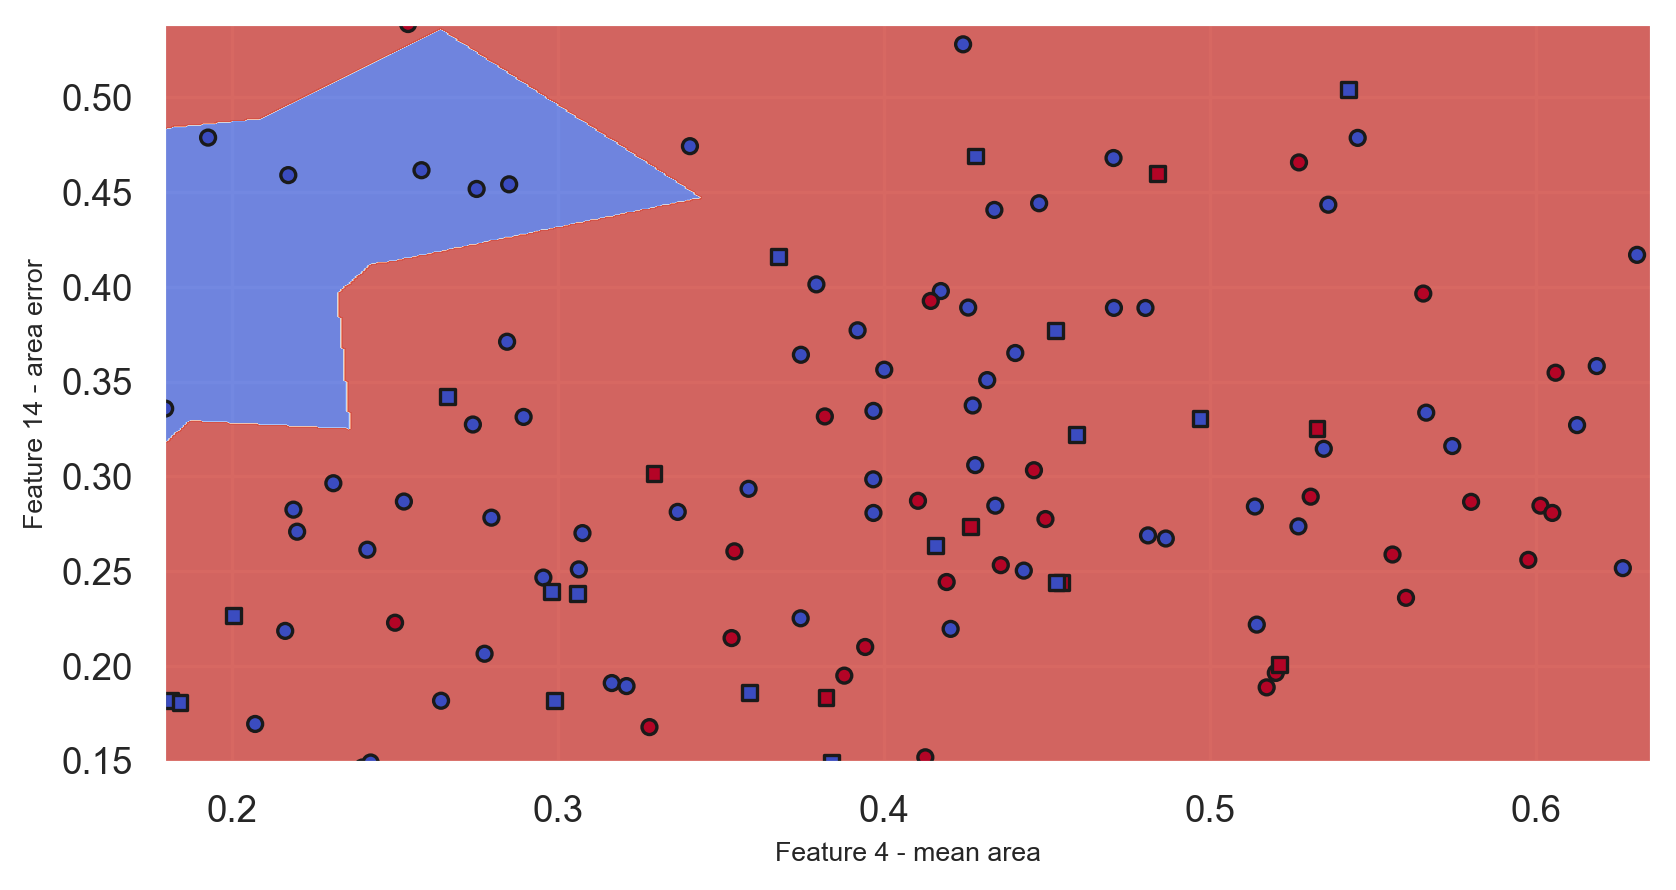

In [39]:
# Your code here
xMean = np.array(0.5*(np.mean(positiveDF, axis=0) + np.mean(negativeDF, axis=0)))[1:]

pair =  [(a, b) for idx, a in enumerate(query_cols) for b in query_cols[idx + 1:]]

for idx, fP in enumerate(pair):
    
    plt.figure(figsize= (8,4))
    f1, f2 = fP
    x10, x90 = np.percentile(X_train[:,f1],[10,90])
    y10, y90 = np.percentile(X_train[:,f2],[10,90])
    xx, yy = make_meshgrid(np.array([x10, x90]), np.array([y10, y90]), 500)

    plot_contours(MODEL, xx, yy, xMean, f1, f2, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:,f1], X_train[:,f2], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.scatter(X_val[:,f1], X_val[:,f2], c=y_val, cmap=plt.cm.coolwarm, s=20, edgecolors="k", marker='s')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(f"Feature {f1} - {featureList[f1 -1]}", size = 8)
    plt.ylabel(f"Feature {f2} - {featureList[f2 -1]}", size = 8)
    plt.show()

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [54]:
print(f"Based on the confusion matrix from the validation and testing set. The KNN model meet the client's \n criteria. Because the true positive (correctly detecting malignant cancer when it is present) on the \n validation set is 91% and 90% on testing set (unbiased data) which match the clients criteria. The \n second criteria is also met since the false positive (detecting benign as malignant) is 4% in \n validation set and 12% in testing set which is still below 1 in 5 patients (20%).")

Based on the confusion matrix from the validation and testing set. The KNN model meet the client's 
 criteria. Because the true positive (correctly detecting malignant cancer when it is present) on the 
 validation set is 91% and 90% on testing set (unbiased data) which match the clients criteria. The 
 second criteria is also met since the false positive (detecting benign as malignant) is 4% in 
 validation set and 12% in testing set which is still below 1 in 5 patients (20%).
